In [34]:
# Always show the python version
from platform import python_version
print(f"Python version {python_version()}")

# Grab the important imports 
import pandas as pd
print(f"Pandas version {pd.__version__}")
import numpy as np
print(f"NumPy version {np.__version__}")
import scipy as sp
print(f"SciPy version {sp.__version__}")
import sklearn as sk
print(f"SciKitLearn version {sk.__version__}")
import matplotlib.pyplot as plt
import matplotlib
print(f"matplotlib version {matplotlib.__version__}")
from missingpy import MissForest
import missingpy
print(f"missingpy version {missingpy}")

# And grab the helpers
import sys
sys.path.append("/windir/c/Users/redas/Desktop/jupyter_directory/helpers/src/helpers/")
import general_helpers as gh
import stats_helpers as sh
import mpl_plotting_helpers as mph
from proteomics_helpers import Peptide

textdict = {"fontfamily" : "sans-serif",
            "font" : "Arial",
            "fontsize" : "14"}

Python version 3.9.16
Pandas version 1.4.4
NumPy version 1.22.4
SciPy version 1.9.1
SciKitLearn version 1.1.2
matplotlib version 3.5.3
missingpy version <module 'missingpy' from '/home/kendeegz/python/python39/lib/python3.9/site-packages/missingpy/__init__.py'>


In [2]:
# First, we need to define the relevant columns and rename them
# Note that this method also reorders the columns, so put
# them in the order you want them

groups = ["JE6 0m - U0126", "JE6 5m - U0126", "JE6 0m + U0126", "JE6 5m + U0126",
          "J.PTPN22 KO 0m - U0126", "J.PTPN22 KO 5m - U0126", "J.PTPN22 KO 0m + U0126", "J.PTPN22 KO 5m + U0126",
          "J.TCPTP KO 0m - U0126", "J.TCPTP KO 5m - U0126", "J.TCPTP KO 0m + U0126", "J.TCPTP KO 5m + U0126"]

comparisons = [(groups[1], groups[0]), (groups[5], groups[4]), (groups[9], groups[8]),   # 5m/0m - U0126
               (groups[4], groups[0]), (groups[8], groups[0]),                           # KO 0m/WT 0m - U0126
               (groups[5], groups[1]), (groups[9], groups[1]),                           # KO 5m/WT 5m - U0126
               (groups[3], groups[2]), (groups[7], groups[6]), (groups[11], groups[10]), # 5m/0m + U0126
               (groups[6], groups[2]), (groups[10], groups[2]),                          # KO 0m/WT 0m +U0126
               (groups[7], groups[3]), (groups[11], groups[3]),                          # KO 5m/WT 5m +U0126
               (groups[2], groups[0]),  (groups[3], groups[1]),                          # JE6 0m, 5m +/- U0126
               (groups[6], groups[4]),  (groups[7], groups[5]),                          # J.PTPN22 0m, 5m +/- U0126
               (groups[10], groups[8]),  (groups[11], groups[9]),                        # J.TCPTP, 5m +/- U0126
              ]

comp_inds = [(groups.index(item[0]), groups.index(item[1])) for item in comparisons]

comp_labels = [gh.list_to_str(comp, delimiter = " vs ", newline = False) for comp in comparisons]

# For when the full export works properly
#                  "peakarea manual 1 rep5 thresholded timepoint12" : "J.TCPTP KO 5m + U0126 R5",

rename_columns = {"peakarea manual 1 rep1 thresholded timepoint1" : "JE6 0m - U0126 R1",
                  "peakarea manual 1 rep2 thresholded timepoint1" : "JE6 0m - U0126 R2",
                  "peakarea manual 1 rep3 thresholded timepoint1" : "JE6 0m - U0126 R3",
                  "peakarea manual 1 rep4 thresholded timepoint1" : "JE6 0m - U0126 R4",
                  "peakarea manual 1 rep5 thresholded timepoint1" : "JE6 0m - U0126 R5",
                  "peakarea manual 1 rep1 thresholded timepoint2" : "JE6 5m - U0126 R1",
                  "peakarea manual 1 rep2 thresholded timepoint2" : "JE6 5m - U0126 R2",
                  "peakarea manual 1 rep3 thresholded timepoint2" : "JE6 5m - U0126 R3",
                  "peakarea manual 1 rep4 thresholded timepoint2" : "JE6 5m - U0126 R4",
                  "peakarea manual 1 rep5 thresholded timepoint2" : "JE6 5m - U0126 R5",
                  "peakarea manual 1 rep1 thresholded timepoint3" : "JE6 0m + U0126 R1",
                  "peakarea manual 1 rep2 thresholded timepoint3" : "JE6 0m + U0126 R2",
                  "peakarea manual 1 rep3 thresholded timepoint3" : "JE6 0m + U0126 R3",
                  "peakarea manual 1 rep4 thresholded timepoint3" : "JE6 0m + U0126 R4",
                  "peakarea manual 1 rep5 thresholded timepoint3" : "JE6 0m + U0126 R5",
                  "peakarea manual 1 rep1 thresholded timepoint4" : "JE6 5m + U0126 R1",
                  "peakarea manual 1 rep2 thresholded timepoint4" : "JE6 5m + U0126 R2",
                  "peakarea manual 1 rep3 thresholded timepoint4" : "JE6 5m + U0126 R3",
                  "peakarea manual 1 rep4 thresholded timepoint4" : "JE6 5m + U0126 R4",
                  "peakarea manual 1 rep5 thresholded timepoint4" : "JE6 5m + U0126 R5",
                  "peakarea manual 1 rep1 thresholded timepoint5" : "J.PTPN22 KO 0m - U0126 R1",
                  "peakarea manual 1 rep2 thresholded timepoint5" : "J.PTPN22 KO 0m - U0126 R2",
                  "peakarea manual 1 rep3 thresholded timepoint5" : "J.PTPN22 KO 0m - U0126 R3",
                  "peakarea manual 1 rep4 thresholded timepoint5" : "J.PTPN22 KO 0m - U0126 R4",
                  "peakarea manual 1 rep5 thresholded timepoint5" : "J.PTPN22 KO 0m - U0126 R5",
                  "peakarea manual 1 rep1 thresholded timepoint6" : "J.PTPN22 KO 5m - U0126 R1",
                  "peakarea manual 1 rep2 thresholded timepoint6" : "J.PTPN22 KO 5m - U0126 R2",
                  "peakarea manual 1 rep3 thresholded timepoint6" : "J.PTPN22 KO 5m - U0126 R3",
                  "peakarea manual 1 rep4 thresholded timepoint6" : "J.PTPN22 KO 5m - U0126 R4",
                  "peakarea manual 1 rep5 thresholded timepoint6" : "J.PTPN22 KO 5m - U0126 R5",
                  "peakarea manual 1 rep1 thresholded timepoint7" : "J.PTPN22 KO 0m + U0126 R1",
                  "peakarea manual 1 rep2 thresholded timepoint7" : "J.PTPN22 KO 0m + U0126 R2",
                  "peakarea manual 1 rep3 thresholded timepoint7" : "J.PTPN22 KO 0m + U0126 R3",
                  "peakarea manual 1 rep4 thresholded timepoint7" : "J.PTPN22 KO 0m + U0126 R4",
                  "peakarea manual 1 rep5 thresholded timepoint7" : "J.PTPN22 KO 0m + U0126 R5",
                  "peakarea manual 1 rep1 thresholded timepoint8" : "J.PTPN22 KO 5m + U0126 R1",
                  "peakarea manual 1 rep2 thresholded timepoint8" : "J.PTPN22 KO 5m + U0126 R2",
                  "peakarea manual 1 rep3 thresholded timepoint8" : "J.PTPN22 KO 5m + U0126 R3",
                  "peakarea manual 1 rep4 thresholded timepoint8" : "J.PTPN22 KO 5m + U0126 R4",
                  "peakarea manual 1 rep5 thresholded timepoint8" : "J.PTPN22 KO 5m + U0126 R5",
                  "peakarea manual 1 rep1 thresholded timepoint9" : "J.TCPTP KO 0m - U0126 R1",
                  "peakarea manual 1 rep2 thresholded timepoint9" : "J.TCPTP KO 0m - U0126 R2",
                  "peakarea manual 1 rep3 thresholded timepoint9" : "J.TCPTP KO 0m - U0126 R3",
                  "peakarea manual 1 rep4 thresholded timepoint9" : "J.TCPTP KO 0m - U0126 R4",
                  "peakarea manual 1 rep5 thresholded timepoint9" : "J.TCPTP KO 0m - U0126 R5",
                  "peakarea manual 1 rep1 thresholded timepoint10" : "J.TCPTP KO 5m - U0126 R1",
                  "peakarea manual 1 rep2 thresholded timepoint10" : "J.TCPTP KO 5m - U0126 R2",
                  "peakarea manual 1 rep3 thresholded timepoint10" : "J.TCPTP KO 5m - U0126 R3",
                  "peakarea manual 1 rep4 thresholded timepoint10" : "J.TCPTP KO 5m - U0126 R4",
                  "peakarea manual 1 rep5 thresholded timepoint10" : "J.TCPTP KO 5m - U0126 R5",
                  "peakarea manual 1 rep1 thresholded timepoint11" : "J.TCPTP KO 0m + U0126 R1",
                  "peakarea manual 1 rep2 thresholded timepoint11" : "J.TCPTP KO 0m + U0126 R2",
                  "peakarea manual 1 rep3 thresholded timepoint11" : "J.TCPTP KO 0m + U0126 R3",
                  "peakarea manual 1 rep4 thresholded timepoint11" : "J.TCPTP KO 0m + U0126 R4",
                  "peakarea manual 1 rep5 thresholded timepoint11" : "J.TCPTP KO 0m + U0126 R5",
                  "peakarea manual 1 rep1 thresholded timepoint12" : "J.TCPTP KO 5m + U0126 R1",
                  "peakarea manual 1 rep2 thresholded timepoint12" : "J.TCPTP KO 5m + U0126 R2",
                  "peakarea manual 1 rep3 thresholded timepoint12" : "J.TCPTP KO 5m + U0126 R3",
                  "peakarea manual 1 rep4 thresholded timepoint12" : "J.TCPTP KO 5m + U0126 R4",
                  "protein name manual" : "Protein Name",
                  "UNIPROT Gene Name" : "Gene Name",
                  "assigned sequence" : "Sequence",
                  "phosphosite annotated" : "Phosphorylation Site(s)",
                  "charge state peptide cache" : "Charge State",
                  "ascore max" : "AScore",
                  "Go location unique index" : "GO Localisation",
                  "Go bio process unqiue index" : "GO Biological Processes",
                  "Go mol process unique index" : "GO Molecular Processes"}

In [3]:
print(comp_labels)

['JE6 5m - U0126 vs JE6 0m - U0126', 'J.PTPN22 KO 5m - U0126 vs J.PTPN22 KO 0m - U0126', 'J.TCPTP KO 5m - U0126 vs J.TCPTP KO 0m - U0126', 'J.PTPN22 KO 0m - U0126 vs JE6 0m - U0126', 'J.TCPTP KO 0m - U0126 vs JE6 0m - U0126', 'J.PTPN22 KO 5m - U0126 vs JE6 5m - U0126', 'J.TCPTP KO 5m - U0126 vs JE6 5m - U0126', 'JE6 5m + U0126 vs JE6 0m + U0126', 'J.PTPN22 KO 5m + U0126 vs J.PTPN22 KO 0m + U0126', 'J.TCPTP KO 5m + U0126 vs J.TCPTP KO 0m + U0126', 'J.PTPN22 KO 0m + U0126 vs JE6 0m + U0126', 'J.TCPTP KO 0m + U0126 vs JE6 0m + U0126', 'J.PTPN22 KO 5m + U0126 vs JE6 5m + U0126', 'J.TCPTP KO 5m + U0126 vs JE6 5m + U0126', 'JE6 0m + U0126 vs JE6 0m - U0126', 'JE6 5m + U0126 vs JE6 5m - U0126', 'J.PTPN22 KO 0m + U0126 vs J.PTPN22 KO 0m - U0126', 'J.PTPN22 KO 5m + U0126 vs J.PTPN22 KO 5m - U0126', 'J.TCPTP KO 0m + U0126 vs J.TCPTP KO 0m - U0126', 'J.TCPTP KO 5m + U0126 vs J.TCPTP KO 5m - U0126']


In [4]:
# Read the peptide depot output file
data = pd.read_excel("PTPN22_TCPTP_U0126_pTyr_DDA_non_unique_sites.xls")
data.rename(columns = rename_columns, inplace = True)
data = data.filter(items = list(rename_columns.values()))
data["Unique ID"] = data["Gene Name"].map(str) + "$^{" + data["Phosphorylation Site(s)"].map(str) + "}$"
data["Median Row Intensity"] = data[[col for col in list(data.columns) if "U0126 R" in col]].median(axis=1)
data["Total Missing Values in Row"] = data[[col for col in list(data.columns) if "U0126 R" in col]].isnull().sum(axis=1)

In [5]:
data[[col for col in list(data.columns) if "U0126 R" in col]] = np.log2(data[[col for col in list(data.columns) if "U0126 R" in col]])


In [6]:
data.columns[:59]

Index(['JE6 0m - U0126 R1', 'JE6 0m - U0126 R2', 'JE6 0m - U0126 R3',
       'JE6 0m - U0126 R4', 'JE6 0m - U0126 R5', 'JE6 5m - U0126 R1',
       'JE6 5m - U0126 R2', 'JE6 5m - U0126 R3', 'JE6 5m - U0126 R4',
       'JE6 5m - U0126 R5', 'JE6 0m + U0126 R1', 'JE6 0m + U0126 R2',
       'JE6 0m + U0126 R3', 'JE6 0m + U0126 R4', 'JE6 0m + U0126 R5',
       'JE6 5m + U0126 R1', 'JE6 5m + U0126 R2', 'JE6 5m + U0126 R3',
       'JE6 5m + U0126 R4', 'JE6 5m + U0126 R5', 'J.PTPN22 KO 0m - U0126 R1',
       'J.PTPN22 KO 0m - U0126 R2', 'J.PTPN22 KO 0m - U0126 R3',
       'J.PTPN22 KO 0m - U0126 R4', 'J.PTPN22 KO 0m - U0126 R5',
       'J.PTPN22 KO 5m - U0126 R1', 'J.PTPN22 KO 5m - U0126 R2',
       'J.PTPN22 KO 5m - U0126 R3', 'J.PTPN22 KO 5m - U0126 R4',
       'J.PTPN22 KO 5m - U0126 R5', 'J.PTPN22 KO 0m + U0126 R1',
       'J.PTPN22 KO 0m + U0126 R2', 'J.PTPN22 KO 0m + U0126 R3',
       'J.PTPN22 KO 0m + U0126 R4', 'J.PTPN22 KO 0m + U0126 R5',
       'J.PTPN22 KO 5m + U0126 R1', 'J.PTPN22 K

In [7]:
group_inds = [[list(data.columns).index(col) for col in list(data.columns) if g in col]
              for g in groups]
group_inds

[[0, 1, 2, 3, 4],
 [5, 6, 7, 8, 9],
 [10, 11, 12, 13, 14],
 [15, 16, 17, 18, 19],
 [20, 21, 22, 23, 24],
 [25, 26, 27, 28, 29],
 [30, 31, 32, 33, 34],
 [35, 36, 37, 38, 39],
 [40, 41, 42, 43, 44],
 [45, 46, 47, 48, 49],
 [50, 51, 52, 53, 54],
 [55, 56, 57, 58]]

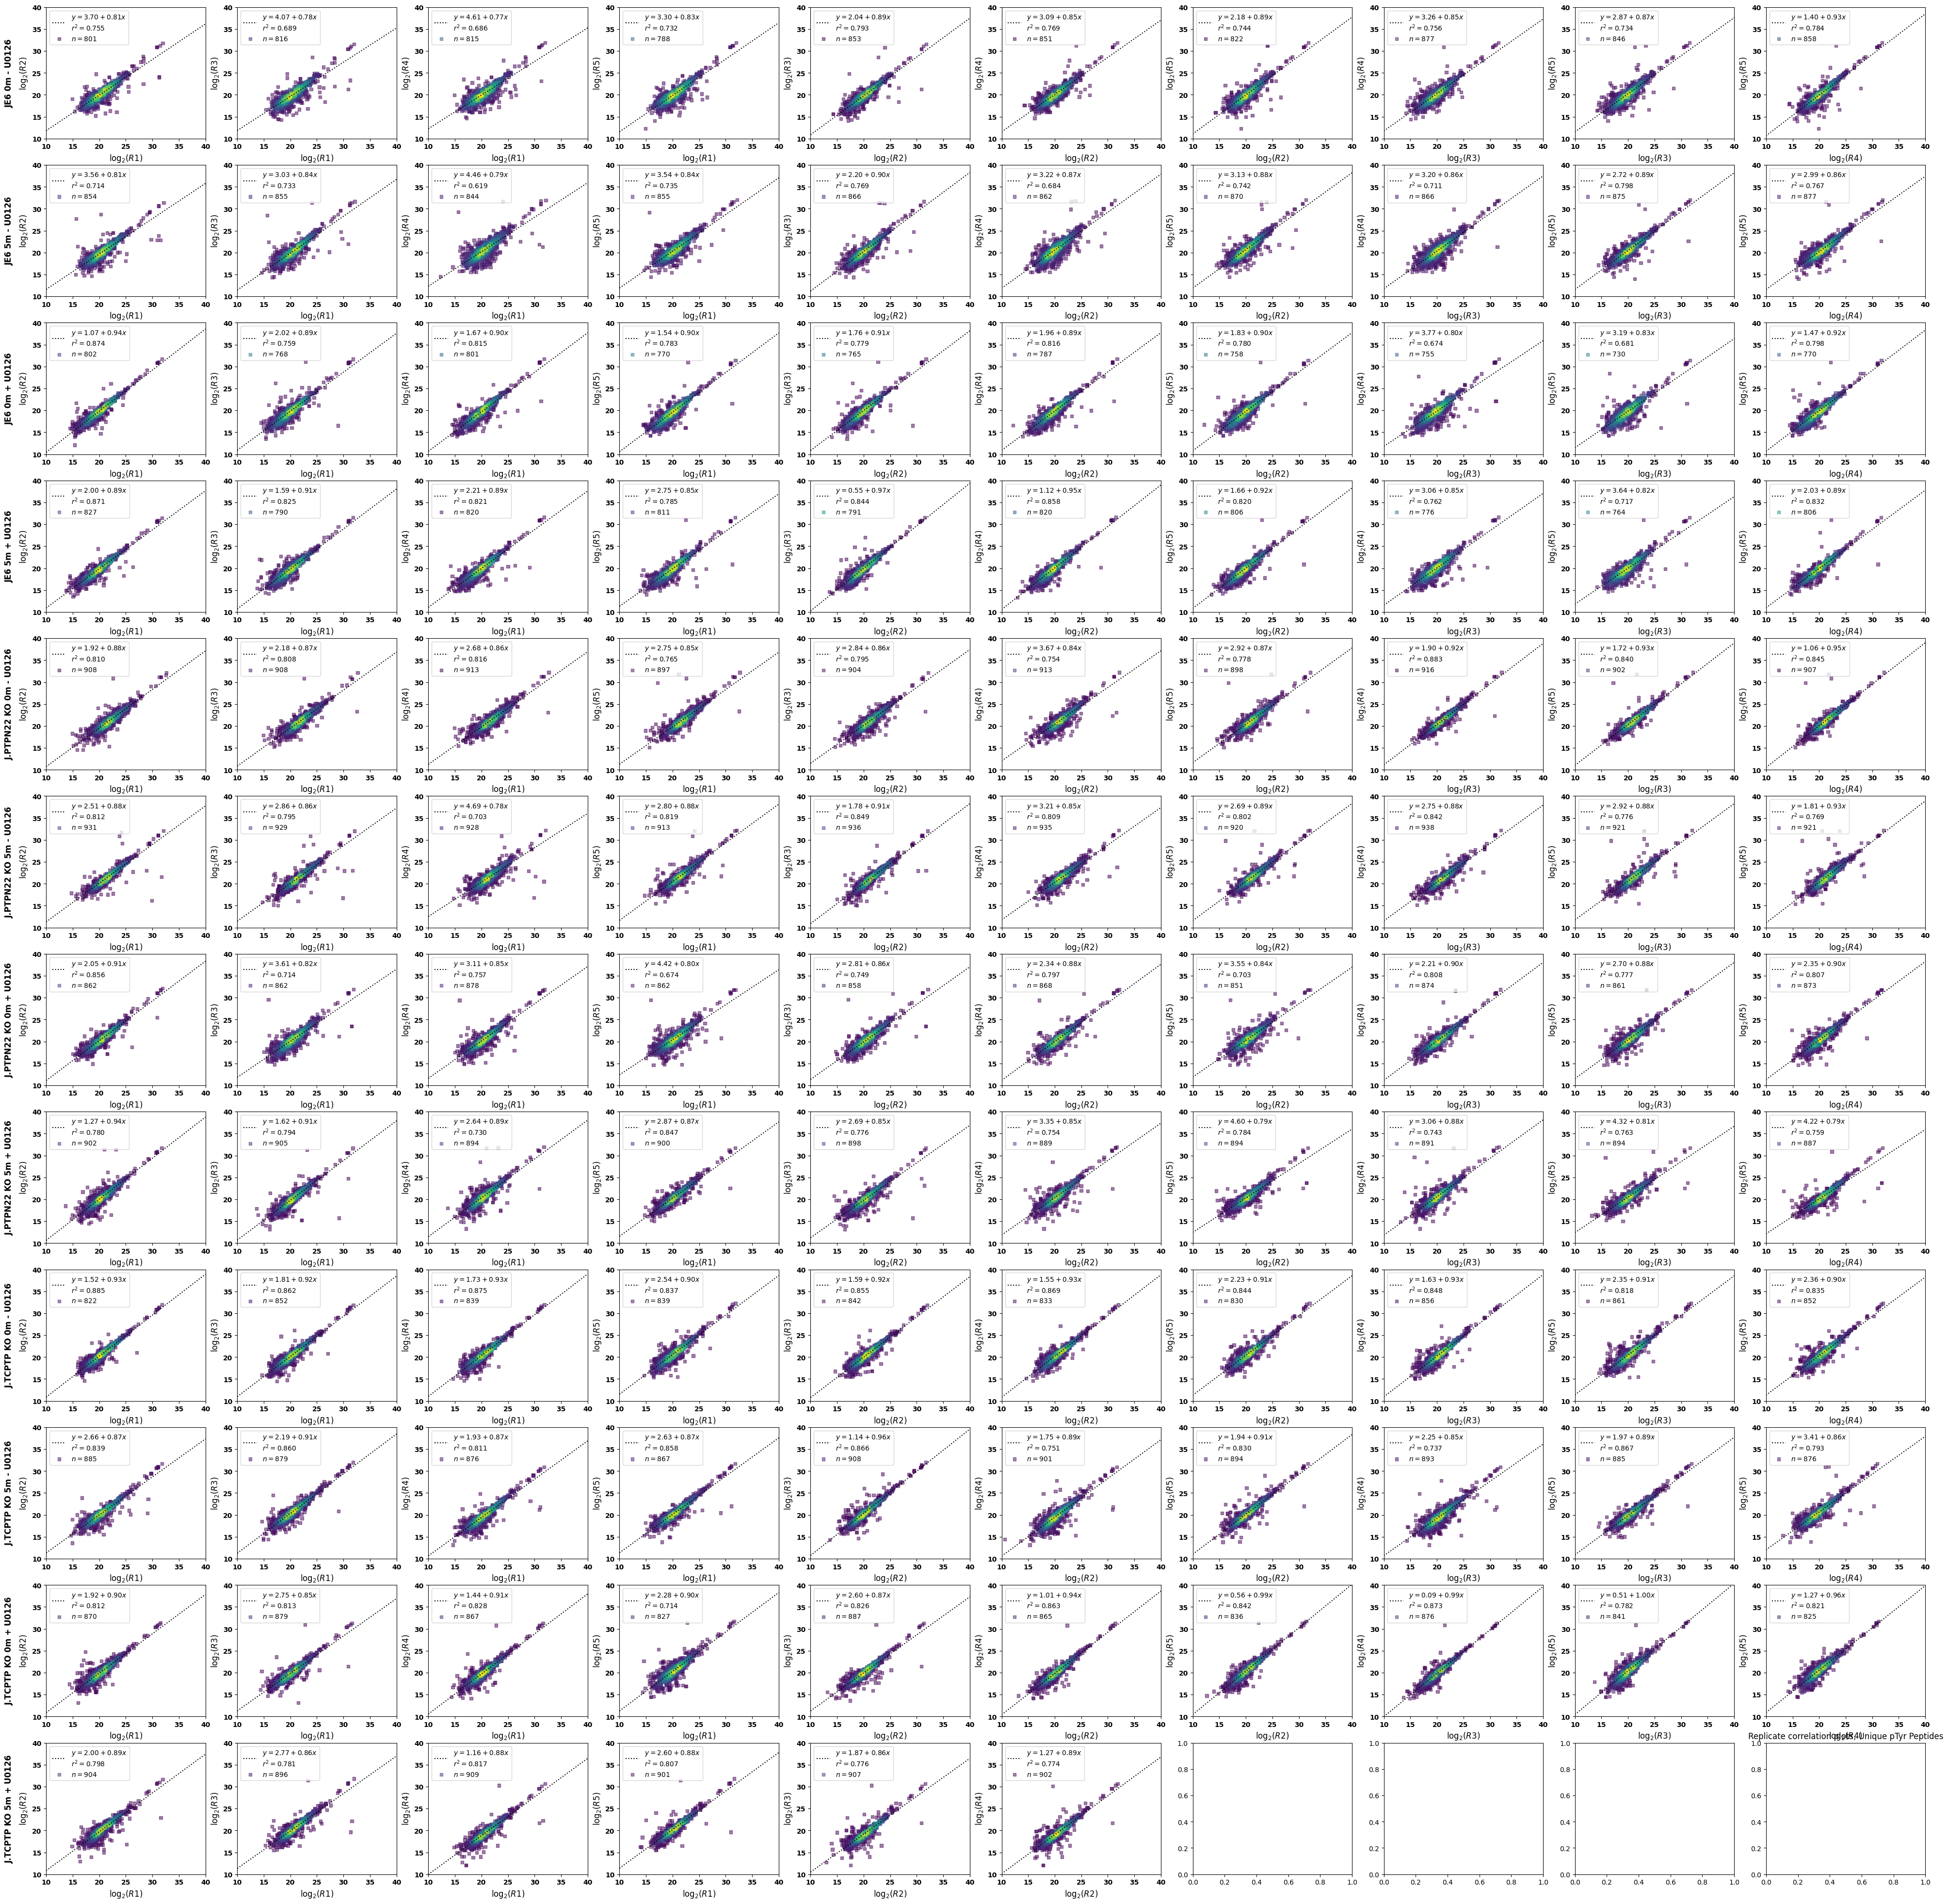

In [8]:
# Should probably do replicate correlation pre and post imputation

fig, ax = plt.subplots(12,10,figsize = (50,50))

rep_cor_pairs = [list(gh.make_pairs(g_ind)) for g_ind in group_inds]
cols = list(data.columns)

xlabels = [fr"$\log_{2}(R1)$", fr"$\log_{2}(R1)$", fr"$\log_{2}(R1)$", fr"$\log_{2}(R1)$", fr"$\log_{2}(R2)$",
           fr"$\log_{2}(R2)$", fr"$\log_{2}(R2)$", fr"$\log_{2}(R3)$", fr"$\log_{2}(R3)$", fr"$\log_{2}(R4)$"]

ylabels = [fr"$\log_{2}(R2)$", fr"$\log_{2}(R3)$", fr"$\log_{2}(R4)$", fr"$\log_{2}(R5)$", fr"$\log_{2}(R3)$", 
          fr"$\log_{2}(R4)$", fr"$\log_{2}(R5)$", fr"$\log_{2}(R4)$", fr"$\log_{2}(R5)$", fr"$\log_{2}(R5)$"]

i = 0
for row in rep_cor_pairs:
    ax[i][0].annotate(groups[i], xy=(0,0.5), xytext=(-ax[i][0].yaxis.labelpad - 10, 0),
                      xycoords = ax[i][0].yaxis.label, textcoords="offset points",
                      size = "large", ha = "center", va = "center", rotation = 90,
                      fontweight = "bold")
    j = 0
    for pair in row:
        pair = list(pair)
        mph.scatter_gausskde(list(data[cols[pair[0]]]), list(data[cols[pair[1]]]), 
                             ax[i][j], ylim = (10,40), xlim = (10,40))
        ax[i][j].set_ylabel(ylabels[j], fontsize = 12)
        ax[i][j].set_xlabel(xlabels[j], fontsize= 12)
            
        j+=1
    i+=1


plt.title("Replicate correlation plots, Unique pTyr Peptides")
plt.savefig("outputs/graphics/rep_corr_plot.pdf")

In [9]:
imputer = MissForest(random_state = 69)
imputed_data = imputer.fit_transform(data[[col for col in list(data.columns) if "U0126 R" in col]].to_numpy().transpose())

[ 0  0  0  0  0  0  0  0  0  0  0  0  0 15  3  2  8  0  0  0  0  0  0 40
  1  0 18 11 20  0 33  0  0 31  0  0  0  2  1  1  2  1  0  1 27 35  0  0
  0  0  0  0  0  0  0  0  0 21  0  0  0  0  4  0  0  0  3  0 10  0 13  0
  0  0 32  0  0  0  0  1  0  0  2 14  0  0  3 11 10  0  3  3 22  0 20  0
  5  0  0 36  0  0  0  2  2  0  0  0  0  0  7  1  0  2  0  1  3  0  0  0
 29  2  0  0  0 10  0  0  0  0  1  2  0  1  0  2  0  2  0  0  0  0 28 23
 38  4  0  0  3  0  0  0  1 11  1  0  7 25  0  0  3  2  0  1  0  0  0  0
  0  0 42  2  5  0  2 11  2  0  6  5  0 18  9 16  7  0  6  0  0 18 16  2
 30  0  0 23  0  0  6  4 11  0  6  0  8 10  0  0  0  0 27  0  2  8  0  0
  5  0  0  0  0 15  0  0  1 17  0  0  0  0  0  0  0  0  0 11  5  0  0  0
  0  0  0  0  2  0 25  0  0  0  0  0  0  0  0  1  0  0  0  0  0 14  0  1
 24  0  0 12  0  0  0  0  0 18  0  0  0 12 14  0  0  2  2  0 23 29 31 33
  0  5 14  3 33 37 37  0  3  0 24  0  6  2  0  0  0  9  1  2  9  5  0  1
  0  0  1  0  0  4  3  0  0  0 14  0  0  0 11  9 37

In [37]:
imputed = pd.DataFrame(imputed_data.transpose(), columns = [col for col in list(data.columns) if "U0126 R" in col])

hist_data = [list(data[col].to_numpy()) for col in data.columns[:59]]
imputed = [list(imputed[col].to_numpy()) for col in imputed.columns]

imputed = [[imputed[i][j] for j in range(len(imputed[i])) if hist_data[i][j] != hist_data[i][j]] for i in range(len(imputed))]
hist_data = [[item for item in col if item == item] for col in hist_data]

imputed = [imputed[i*5:(i+1)*5] for i in range(12)]
hist_data = [hist_data[i*5:(i+1)*5] for i in range(12)]

hist_labels = [["0 min"], ["5 min"],["0 min"], ["5 min"],
              ["0 min"], ["5 min"],["0 min"], ["5 min"],
              ["0 min"], ["5 min"],["0 min"], ["5 min"]]
hist_subgroups = ["$0.04\%$ DMSO", "$20\mu$M U0126","$0.04\%$ DMSO", "$20\mu$M U0126","$0.04\%$ DMSO", "$20\mu$M U0126"]
hist_groups = ["JE6", "J.PTPN22 KO", "J.TCPTP KO"]

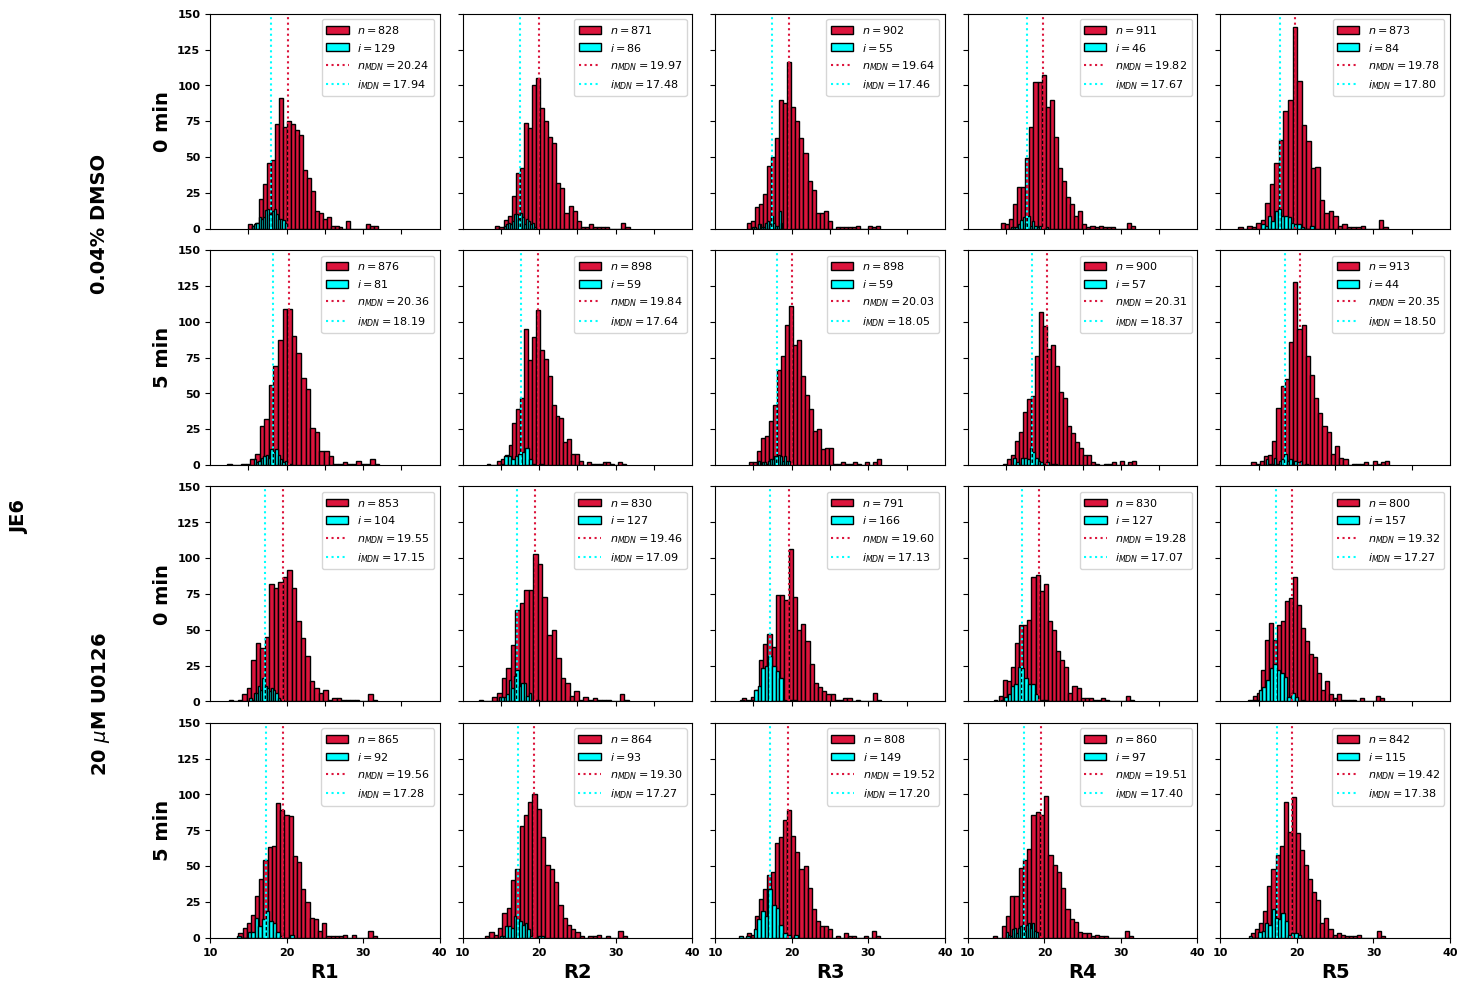

In [105]:
import matplotlib.font_manager as font_manager
font = font_manager.FontProperties(family='sans-serif',
                                   style='normal', size=8)
hist_x = ["R1", "R2", "R3", "R4", "R5"]
hist_max = 150
fig2, ax2 = plt.subplots(4,5, figsize = (16,12))
#fig2.suptitle("\n\n\n\n\n" + "U0126 Experiment Distributions ($\log_{2}$ transformed intensities)", 
#              fontfamily = "sans-serif", font = "Arial", fontweight = "bold", fontsize = 16)
n_bins = 33

for i in range(4):
    for j in range(len(hist_data[i])):
        hist_med = sh.median(hist_data[i][j])
        imp_med = sh.median(imputed[i][j])
        ax2[i][j].hist(hist_data[i][j][1:], bins = n_bins, color = "crimson", edgecolor = "black",
                       label = fr"$n = {len([d for d in hist_data[i][j][1:] if d == d]) - 1}$")
        ax2[i][j].hist(imputed[i][j][1:], bins = n_bins//2, color = "cyan", edgecolor = "black",
                       label = fr"$i={len(imputed[i][j])-1}$")
        ax2[i][j].plot([hist_med, hist_med], [0,hist_max], color = "crimson", 
                       linestyle = ":", label = fr"$n_{{MDN}} = {hist_med:.2f}$")
        ax2[i][j].plot([imp_med, imp_med], [0,hist_max], color = "cyan", linestyle = ":",label = fr"$i_{{MDN}} = {imp_med:.2f}$")
        ax2[i][j].legend(loc="upper right", prop=font)
        #print(f"\tNumber of imputed values for {hist_data[i][j][0]:^15} : {len(imputed[i][j])}")
        ax2[i][j].set_xlim(10,40)
        ax2[i][j].set_ylim(0,hist_max)
        if j != 0:
            ax2[i][j].set_yticks([0,25,50,75,100,125,150])
            ax2[i][j].set_yticklabels(["" for i in range(7)])
        else:
            mph.update_ticks(ax2[i][j],
                             which = "y",
                              fontdict = {"fontfamily" : "sans-serif",
                               "font" : "Arial",
                               #"ha" : "center",
                               "fontweight" : "bold",
                               "fontsize" : "8"})
            ax2[i][j].set_ylabel(hist_labels[i][j], fontweight = "bold", **textdict)
        if i != 3:
            ax2[i][j].set_xticks([15,20,25,30,35])
            ax2[i][j].set_xticklabels(["","","","",""])
        else:
            mph.update_ticks(ax2[i][j],
                             which = "x",
                              fontdict = {"fontfamily" : "sans-serif",
                               "font" : "Arial",
                               #"ha" : "center",
                               "fontweight" : "bold",
                               "fontsize" : "8"})
            ax2[i][j].set_xlabel(hist_x[j], fontweight = "bold", **textdict)

plt.subplots_adjust(wspace = 0.1,hspace = 0.1)
fig2.text(0,0.45,"JE6", rotation = 90, **{"fontfamily" : "sans-serif",
                               "font" : "Arial",
                               #"ha" : "center",
                               "fontweight" : "bold",
                               "fontsize" : "14"})
fig2.text(0.05,0.65,"0.04% DMSO", rotation = 90, **{"fontfamily" : "sans-serif",
                               "font" : "Arial",
                               #"ha" : "center",
                               "fontweight" : "bold",
                               "fontsize" : "14"})
fig2.text(0.05,0.25,"20 $\mu$M U0126", rotation = 90, **{"fontfamily" : "sans-serif",
                               "font" : "Arial",
                               #"ha" : "center",
                               "fontweight" : "bold",
                               "fontsize" : "14"})
plt.savefig("outputs/graphics/log2_replicate_distr_je6.pdf")
plt.show()

0 R1
1 R2
2 R3
3 R4
4 R5


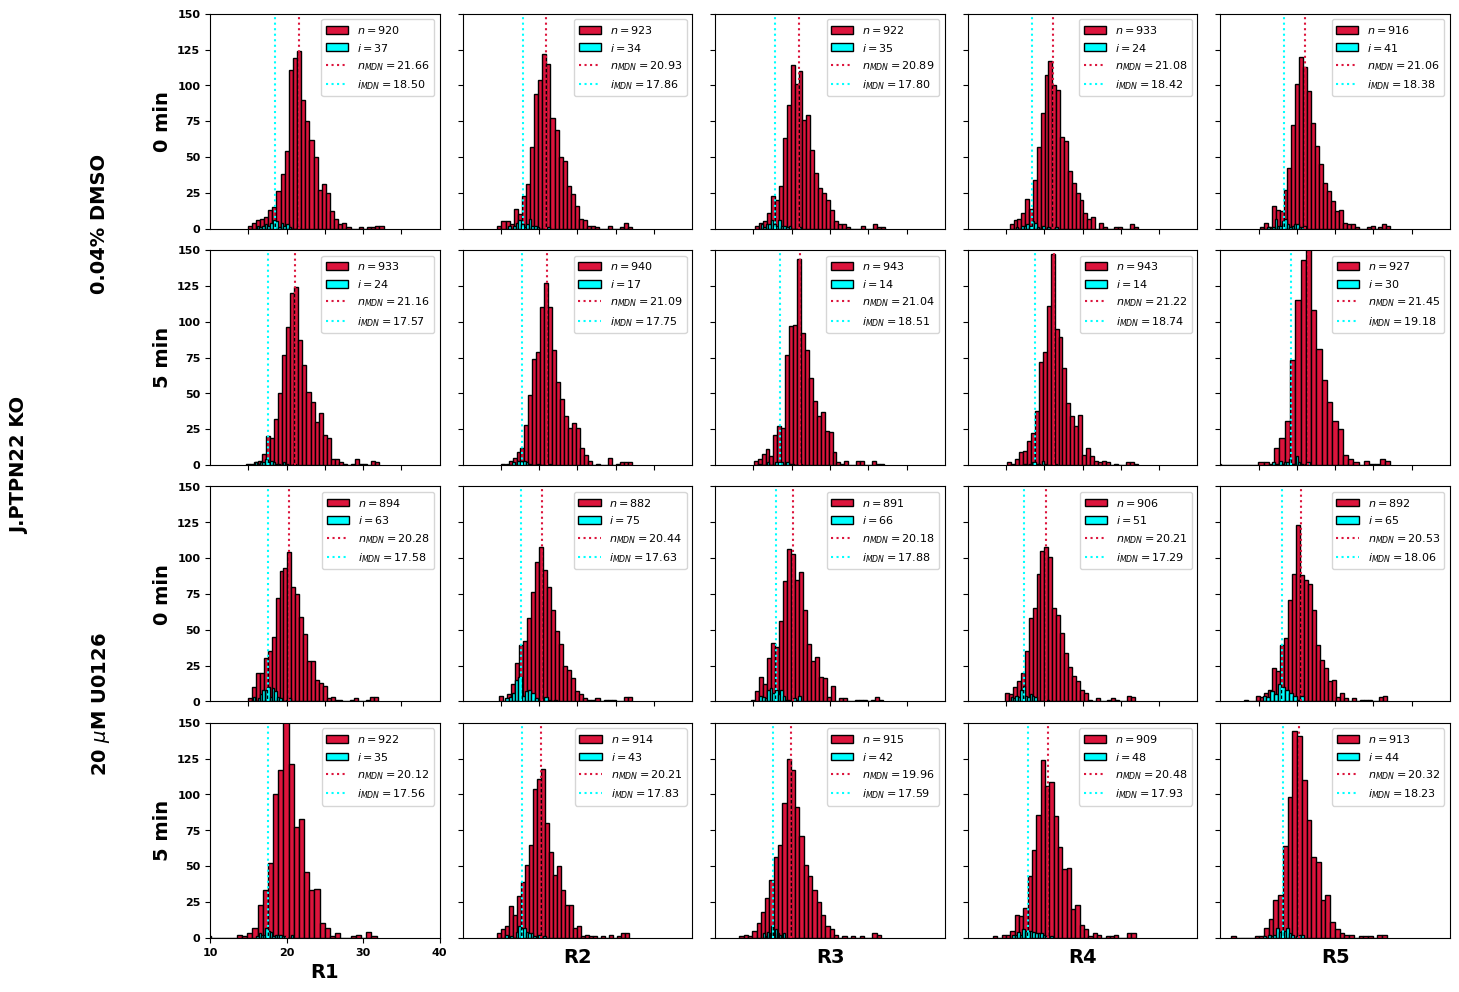

In [114]:
import matplotlib.font_manager as font_manager
font = font_manager.FontProperties(family='sans-serif',
                                   style='normal', size=8)
hist_x = ["R1", "R2", "R3", "R4", "R5"]
hist_max = 150
fig2, ax2 = plt.subplots(4,5, figsize = (16,12))
#fig2.suptitle("\n\n\n\n\n" + "U0126 Experiment Distributions ($\log_{2}$ transformed intensities)", 
#              fontfamily = "sans-serif", font = "Arial", fontweight = "bold", fontsize = 16)
n_bins = 33

for i in range(4,8):
    for j in range(len(hist_data[i])):
        hist_med = sh.median(hist_data[i][j])
        imp_med = sh.median(imputed[i][j])
        ax2[i-4][j].hist(hist_data[i][j][1:], bins = n_bins, color = "crimson", edgecolor = "black",
                       label = fr"$n = {len([d for d in hist_data[i][j][1:] if d == d]) - 1}$")
        ax2[i-4][j].hist(imputed[i][j][1:], bins = n_bins//2, color = "cyan", edgecolor = "black",
                       label = fr"$i={len(imputed[i][j])-1}$")
        ax2[i-4][j].plot([hist_med, hist_med], [0,hist_max], color = "crimson", linestyle = ":", label = fr"$n_{{MDN}} = {hist_med:.2f}$")
        ax2[i-4][j].plot([imp_med, imp_med], [0,hist_max], color = "cyan", linestyle = ":",label = fr"$i_{{MDN}} = {imp_med:.2f}$")
        ax2[i-4][j].legend(loc="upper right", prop=font)
        #print(f"\tNumber of imputed values for {hist_data[i][j][0]:^15} : {len(imputed[i][j])}")
        ax2[i-4][j].set_xlim(10,40)
        ax2[i-4][j].set_ylim(0,hist_max)
        if j-4 != 0:
            ax2[i-4][j-4].set_yticks([0,25,50,75,100,125,150])
            ax2[i-4][j-4].set_yticklabels(["" for i in range(7)])
        else:
            mph.update_ticks(ax2[i-4][j-4],
                             which = "y",
                              fontdict = {"fontfamily" : "sans-serif",
                               "font" : "Arial",
                               #"ha" : "center",
                               "fontweight" : "bold",
                               "fontsize" : "8"})
            ax2[i-4][j-4].set_ylabel(hist_labels[i-4][j-4], fontweight = "bold", **textdict)
        if i-4 != 3:
            ax2[i-4][j-4].set_xticks([15,20,25,30,35])
            ax2[i-4][j-4].set_xticklabels(["","","","",""])
        else:
            mph.update_ticks(ax2[i-4][j-4],
                             which = "x",
                              fontdict = {"fontfamily" : "sans-serif",
                               "font" : "Arial",
                               #"ha" : "center",
                               "fontweight" : "bold",
                               "fontsize" : "8"})
            print(j,hist_x[j])
            ax2[i-4][j].set_xlabel(hist_x[j], fontweight = "bold", **textdict)

plt.subplots_adjust(wspace = 0.1,hspace = 0.1)
fig2.text(0,0.45,"J.PTPN22 KO", rotation = 90, **{"fontfamily" : "sans-serif",
                               "font" : "Arial",
                               #"ha" : "center",
                               "fontweight" : "bold",
                               "fontsize" : "14"})
fig2.text(0.05,0.65,"0.04% DMSO", rotation = 90, **{"fontfamily" : "sans-serif",
                               "font" : "Arial",
                               #"ha" : "center",
                               "fontweight" : "bold",
                               "fontsize" : "14"})
fig2.text(0.05,0.25,"20 $\mu$M U0126", rotation = 90, **{"fontfamily" : "sans-serif",
                               "font" : "Arial",
                               #"ha" : "center",
                               "fontweight" : "bold",
                               "fontsize" : "14"})
plt.savefig("outputs/graphics/log2_replicate_distr_ptpn22.pdf")
plt.show()

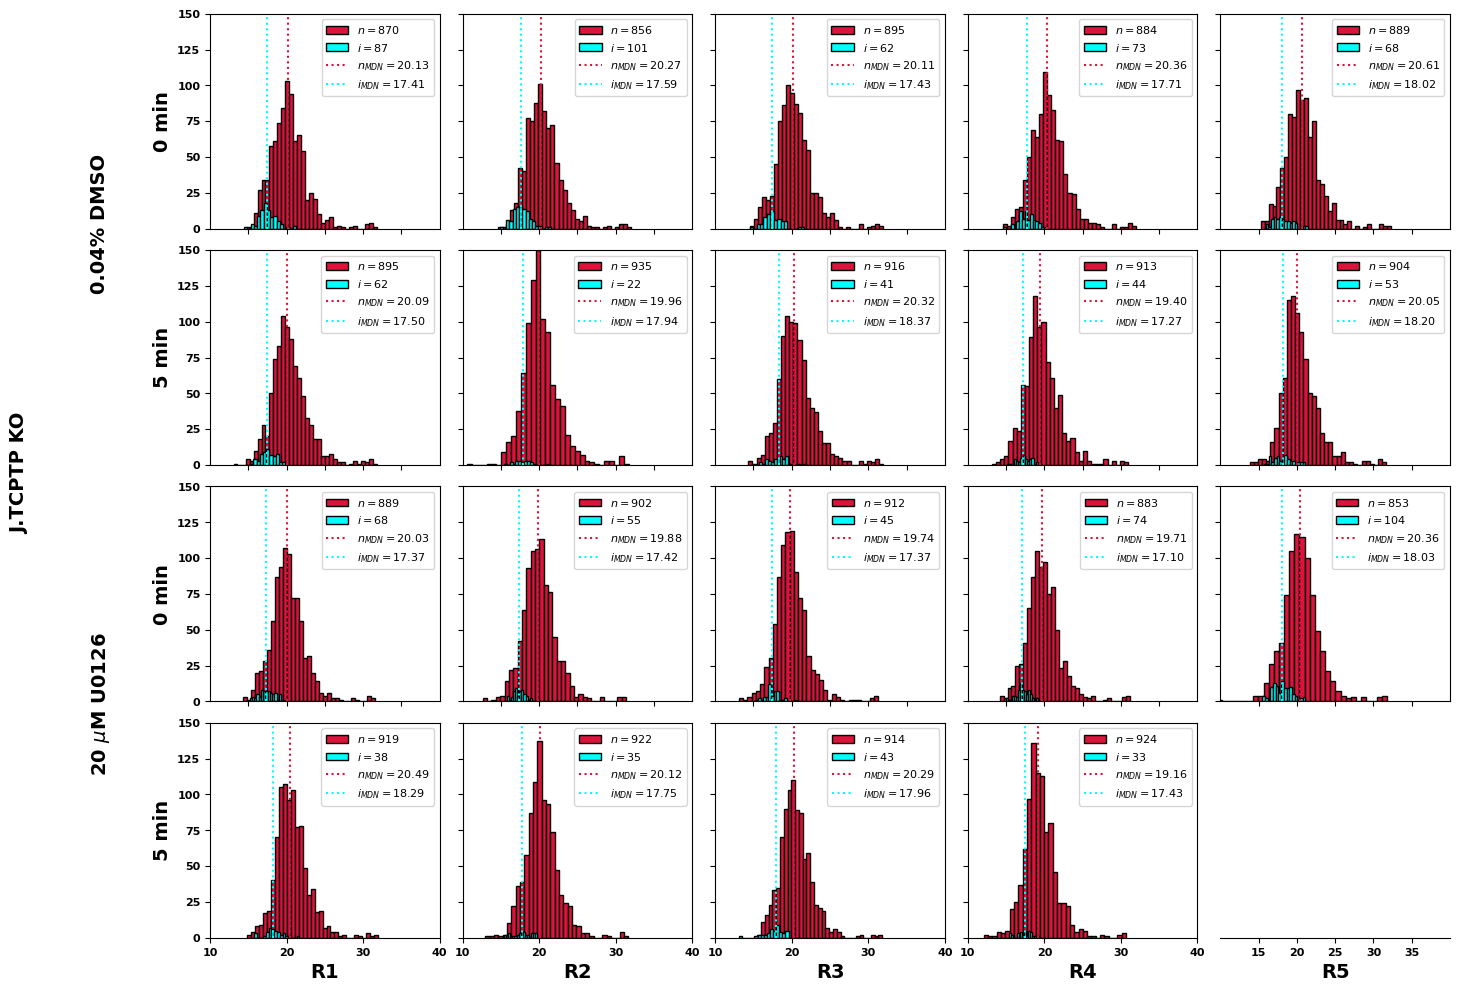

In [107]:
import matplotlib.font_manager as font_manager
font = font_manager.FontProperties(family='sans-serif',
                                   style='normal', size=8)
hist_x = ["R1", "R2", "R3", "R4", "R5"]
hist_max = 150
fig2, ax2 = plt.subplots(4,5, figsize = (16,12))
#fig2.suptitle("\n\n\n\n\n" + "U0126 Experiment Distributions ($\log_{2}$ transformed intensities)", 
#              fontfamily = "sans-serif", font = "Arial", fontweight = "bold", fontsize = 16)
n_bins = 33

for i in range(8,12):
    for j in range(len(hist_data[i])):
        hist_med = sh.median(hist_data[i][j])
        imp_med = sh.median(imputed[i][j])
        ax2[i-8][j].hist(hist_data[i][j][1:], bins = n_bins, color = "crimson", edgecolor = "black",
                       label = fr"$n = {len([d for d in hist_data[i][j][1:] if d == d]) - 1}$")
        ax2[i-8][j].hist(imputed[i][j][1:], bins = n_bins//2, color = "cyan", edgecolor = "black",
                       label = fr"$i={len(imputed[i][j])-1}$")
        ax2[i-8][j].plot([hist_med, hist_med], [0,hist_max], color = "crimson", linestyle = ":", label = fr"$n_{{MDN}} = {hist_med:.2f}$")
        ax2[i-8][j].plot([imp_med, imp_med], [0,hist_max], color = "cyan", linestyle = ":",label = fr"$i_{{MDN}} = {imp_med:.2f}$")
        ax2[i-8][j].legend(loc="upper right", prop=font)
        #print(f"\tNumber of imputed values for {hist_data[i][j][0]:^15} : {len(imputed[i][j])}")
        ax2[i-8][j].set_xlim(10,40)
        ax2[i-8][j].set_ylim(0,hist_max)
        if j != 0:
            ax2[i-8][j].set_yticks([0,25,50,75,100,125,150])
            ax2[i-8][j].set_yticklabels(["" for i in range(7)])
        else:
            mph.update_ticks(ax2[i-8][j],
                             which = "y",
                              fontdict = {"fontfamily" : "sans-serif",
                               "font" : "Arial",
                               #"ha" : "center",
                               "fontweight" : "bold",
                               "fontsize" : "8"})
            ax2[i-8][j].set_ylabel(hist_labels[i][j], fontweight = "bold", **textdict)
        if i-8 != 3:
            ax2[i-8][j].set_xticks([15,20,25,30,35])
            ax2[i-8][j].set_xticklabels(["","","","",""])
        else:
            mph.update_ticks(ax2[i-8][j],
                             which = "x",
                              fontdict = {"fontfamily" : "sans-serif",
                               "font" : "Arial",
                               #"ha" : "center",
                               "fontweight" : "bold",
                               "fontsize" : "8"})
            ax2[i-8][j].set_xlabel(hist_x[j], fontweight = "bold", **textdict)

mph.update_ticks(ax2[3][4],
                             which = "x",
                              fontdict = {"fontfamily" : "sans-serif",
                               "font" : "Arial",
                               #"ha" : "center",
                               "fontweight" : "bold",
                               "fontsize" : "8"})
ax2[3][4].set_xlabel(hist_x[4], fontweight = "bold", **textdict)
ax2[3][4].set_yticks([])
ax2[3][4].set_yticklabels([])
ax2[3][4].set_xticks([15,20,25,30,35])
ax2[3][4].set_xticklabels([15,20,25,30,35])
ax2[3][4].set_xlim(10,40)
ax2[3][4].set_ylim(0,hist_max)
ax2[3][4].spines["top"].set_visible(False)
ax2[3][4].spines["left"].set_visible(False)
ax2[3][4].spines["right"].set_visible(False)

plt.subplots_adjust(wspace = 0.1,hspace = 0.1)
fig2.text(0,0.45,"J.TCPTP KO", rotation = 90, **{"fontfamily" : "sans-serif",
                               "font" : "Arial",
                               #"ha" : "center",
                               "fontweight" : "bold",
                               "fontsize" : "14"})
fig2.text(0.05,0.65,"0.04% DMSO", rotation = 90, **{"fontfamily" : "sans-serif",
                               "font" : "Arial",
                               #"ha" : "center",
                               "fontweight" : "bold",
                               "fontsize" : "14"})
fig2.text(0.05,0.25,"20 $\mu$M U0126", rotation = 90, **{"fontfamily" : "sans-serif",
                               "font" : "Arial",
                               #"ha" : "center",
                               "fontweight" : "bold",
                               "fontsize" : "14"})
plt.savefig("outputs/graphics/log2_replicate_distr_tcptp.pdf")
plt.show()

In [ ]:
rf_pca = sk.decomposition.PCA(n_components = 2)
rf_nmf = sk.decomposition.NMF(n_components = 2, max_iter = 100000, init = "nndsvd")
rf = rf_pca.fit_transform(imputed_data).transpose()
rf_n = rf_nmf.fit_transform(imputed_data).transpose()
rf_n = [[-item for item in rf_n[0]], rf_n[1]]

tcptp = ["blue" for _ in range(5)] + ["skyblue" for _ in range(5)] + ["dodgerblue" for _ in range(5)] + ["turquoise" for _ in range(4)]
ptpn22 = ["red" for _ in range(5)] + ["lightcoral" for _ in range(5)] + ["firebrick" for _ in range(5)] + ["indianred" for _ in range(5)]
je6 = ["green" for _ in range(5)] + ["greenyellow" for _ in range(5)] + ["darkgreen" for _ in range(5)] + ["lawngreen" for _ in range(5)]

colours = je6+ptpn22+tcptp

tc = ["^" for _ in range(10)] + ["v" for _ in range(10)]
pt = ["D" for _ in range(10)] + ["d" for _ in range(10)]
j = ["s" for _ in range(10)] + ["p" for _ in range(10)]

markerstyles = j+tc+pt

fig1, ax1 = plt.subplots(figsize = (7,5))

for i in range(12):
    ax1.scatter(rf[0][i*5:(i+1)*5],rf[1][i*5:(i+1)*5], color=colours[i*5:(i+1)*5], 
                   marker = markerstyles[i*5:(i+1)*5][0],edgecolor = "black", 
                   linewidth = 0.5, label = groups[i])

ax1.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1, prop={'family': 'Arial', 'weight': 'bold', 'size': '10'})
ax1.set_xlabel(f"Principal Component 1 ({rf_pca.explained_variance_ratio_[0]*100:.2f}%)",
               fontdict={'fontfamily': 'sans-serif', 'font': 'Arial', 'fontweight': 'bold', 'fontsize': '12'})
ax1.set_ylabel(f"Principal Component 2 ({rf_pca.explained_variance_ratio_[1]*100:.2f}%)",
                fontdict={'fontfamily': 'sans-serif', 'font': 'Arial', 'fontweight': 'bold', 'fontsize': '12'})

mph.update_ticks(ax1, which = "x", anchor = "center", fontdict={'fontfamily': 'sans-serif', 'font': 'Arial',  'fontweight': 'bold', 'fontsize': '10'})
mph.update_ticks(ax1, which = "y", anchor = "right", fontdict={'fontfamily': 'sans-serif', 'font': 'Arial',  'fontweight': 'bold', 'fontsize': '10'})

plt.tight_layout()
plt.savefig("outputs/graphics/pca_plot.pdf")

#ax1.scatter(*rf, color = colours[:-1])

In [ ]:
print(group_inds)
print(comp_inds)
data_as_num = [[float(val) for val in row] for row in imputed_data.transpose()]
print(data_as_num[0])

In [ ]:
data[[col for col in list(data.columns) if "U0126 R" in col]] = imputed

In [ ]:
# Now to do statistics and stuff
# use imputed_data.transpose(), the group inds and the comparisons to build a matrix



fc = [[sh.mean([row[x] for x in group_inds[pair[0]]]) - sh.mean([row[x] for x in group_inds[pair[1]]]) for row in data_as_num]
      for pair in comp_inds]


tests = [[sh.TTest([row[x] for x in group_inds[pair[0]]],
                   [row[x] for x in group_inds[pair[1]]],
                   test_type = "w",
                   threshold = 3,
                   labels = False).output[0]["pvalue"][0] for row in data_as_num] for pair in comp_inds]

unpacked_ps = gh.unpack_list(tests)
global_q = sh.storey(unpacked_ps,pi0 = 1)

unpacked_qs = list(global_q["qvalue"].astype(float))
packed_qs = [unpacked_qs[i*960:(i+1)*960] for i in range(20)]

for i in range(len(tests)):
    data[f"{comp_labels[i]} Fold-change"] = fc[i]

for i in range(len(tests)):
    data[f"{comp_labels[i]} p-value"] = tests[i]

for i in range(len(packed_qs)):
    data[f"{comp_labels[i]} q-value"] = packed_qs[i]

fig2, ax2 = plt.subplots(1,2, figsize = (12,6))

ax2[0].hist(list(global_q["pvalue"].astype(float)), bins = 100, 
            color = "hotpink", edgecolor = "grey", linewidth = 0.25)
ax2[0].set_xticks([i/10 for i in range(11)])
ax2[0].set_xticklabels([str(i/10) for i in range(11)])
ax2[0].set_ylim(0,5000)
ax2[1].hist(list(global_q["qvalue"].astype(float)), bins = 100, color = "cyan", edgecolor = "grey", linewidth = 0.25)
ax2[1].set_xticks([i/10 for i in range(11)])
ax2[1].set_xticklabels([str(i/10) for i in range(11)])
ax2[1].set_ylim(0,5000)

mph.update_ticks(ax2[0], which = "x", rotation = 45,anchor = "center", fontdict={'fontfamily': 'sans-serif', 'font': 'Arial', 'fontweight': 'bold', 'fontsize': '10'})
mph.update_ticks(ax2[0], which = "y", anchor = "right", fontdict={'fontfamily': 'sans-serif', 'font': 'Arial',  'fontweight': 'bold', 'fontsize': '10'})

mph.update_ticks(ax2[1], which = "x",anchor = "center", rotation = 45, fontdict={'fontfamily': 'sans-serif', 'font': 'Arial', 'fontweight': 'bold', 'fontsize': '10'})
mph.update_ticks(ax2[1], which = "y",anchor = "right", fontdict={'fontfamily': 'sans-serif', 'font': 'Arial',  'fontweight': 'bold', 'fontsize': '10'})

ax2[0].set_ylabel("Counts",fontdict={'fontfamily': 'sans-serif', 'font': 'Arial', 'fontweight': 'bold', 'fontsize': '12'})
ax2[0].set_xlabel("p-value",fontdict={'fontfamily': 'sans-serif', 'font': 'Arial', 'fontweight': 'bold', 'fontsize': '12'})

ax2[1].set_ylabel("Counts",fontdict={'fontfamily': 'sans-serif', 'font': 'Arial', 'fontweight': 'bold', 'fontsize': '12'})
ax2[1].set_xlabel("q-value",fontdict={'fontfamily': 'sans-serif', 'font': 'Arial', 'fontweight': 'bold', 'fontsize': '12'})

ax2[0].plot([0.05, 0.05], [0,5000], color = "black", linestyle = ":")
ax2[1].plot([0.05, 0.05], [0,5000], color = "black", linestyle = ":")

ax2[0].text(0.06, 3500, f"$p < 0.05$ : {sum([1 for _ in unpacked_ps if _ < 0.05])}", rotation = 90, ha = "center",
            va = "bottom",bbox=dict(facecolor='white', edgecolor='black'))

ax2[1].text(0.06, 3500, f"$q < 0.05$ : {sum([1 for _ in list(global_q['qvalue'].astype(float)) if _ < 0.05])}",
            rotation = 90, ha = "center",va = "bottom",bbox=dict(facecolor='white', edgecolor='black'))

plt.tight_layout()
plt.savefig("outputs/graphics/total_hypothesis_correction_histogram.pdf")

plt.show()


In [ ]:
# Now I want to try and make the heatmaps, adding URLs and metadata.
# But first, I need to filter the dataframe to have only unique sites

data = data.sort_values(["Unique ID", "Total Missing Values in Row", "Median Row Intensity"],
                        ascending = [True, True, False])

In [ ]:
data["Duplicates"] = data[["Unique ID", "Total Missing Values in Row", "Median Row Intensity"]].duplicated(subset = "Unique ID")

In [ ]:
data_filtered = data[data["Duplicates"] == False]
data_filtered["invalid row"] = ["nan" in u_id for u_id in list(data_filtered["Unique ID"])]
data_filtered = data_filtered[data_filtered["invalid row"] == False]
data_filtered[["Duplicates", "Unique ID", "Total Missing Values in Row", "Median Row Intensity"]]

In [ ]:
fcs = data_filtered[[col for col in list(data.columns) if "Fold-change" in col]]
sig = data_filtered[[col for col in list(data.columns) if "q-value" in col]]


In [ ]:
data_filtered

In [ ]:
mph.heatmap([list(row) for row in fcs.to_numpy()],
            significance = [list(row) for row in sig.to_numpy()],
            cmap = "PiYG",
            urls = [[f"https://www.phosphosite.org/simpleSearchSubmitAction.action?searchStr={g}" for _ in range(20)] for g in list(data_filtered["Gene Name"])],
            xticks = comp_labels,
            yticks = list(data_filtered["Unique ID"]),
            img_name = "outputs/graphics/ratio_heatmap_unique_ptyr",
            heat_title = "Ratio Heatmap, Unique pTyr Sites",
            clb_label  = "$\log_{2}(FC)$")

In [ ]:
basal = data_filtered[[col for col in list(data_filtered.columns) if "- U0126 R" in col and "0m" in col or col == "Unique ID" or "q-value" in col or "Missing Value" in col]]



In [ ]:
basal = basal[basal["Total Missing Values in Row"] == 0]
basal_clus = sp.cluster.hierarchy.linkage(basal[[col for col in list(data_filtered.columns) if "- U0126 R" in col and "0m" in col and "JE6" in col]],
                                         method = "complete")
order = sp.cluster.hierarchy.leaves_list(sp.cluster.hierarchy.optimal_leaf_ordering(basal_clus, basal[[col for col in list(data_filtered.columns) if "- U0126 R" in col and "0m" in col]].to_numpy()))


In [ ]:
max(order)

In [ ]:
basal = basal.reset_index()
basal = basal.reindex(order)

In [ ]:
data_filtered.to_excel("test.xlsx")

In [ ]:
basal = basal[basal["Total Missing Values in Row"] == 0]

clustered_basal = basal[[col for col in list(data_filtered.columns) if "- U0126 R" in col and "0m" in col]].to_numpy()

basal_mean = sh.mean([sh.mean(row) for row in clustered_basal])
clustered_basal = [[item - basal_mean for item in row] for row in clustered_basal]
print(basal_mean)
#clustered_basal

mph.heatmap(clustered_basal,
            cmap = "coolwarm",
            xticks = [col for col in list(data_filtered.columns) if "- U0126 R" in col and "0m" in col],
            aspect = "auto",
            img_name = "outputs/graphics/basal_state_heatmap_clustered",
            heat_title = "Basal State Clustered Heatmap",
            subplot_args = {"figsize" : (10,10
                                        )},
            remove_spines = False,
            clb_label  = "$\log_{2}(A) - \mu$")

In [ ]:
all_peps = [Peptide(list(data_filtered.iloc[i][[col for col in list(data_filtered.columns) if "U0126 R" in col]].astype(float)),
                    [col for col in list(data_filtered.columns) if "U0126 R" in col],
                    groups,
                    data_filtered.iloc[i]['Sequence'],
                    statistics = list(data_filtered.iloc[i][[col for col in list(data_filtered.columns) if "q-value" in col]].astype(float)),
                    statistics_headers = [col for col in list(data_filtered.columns) if "q-value" in col],
                    foldchange = list(data_filtered.iloc[i][[col for col in list(data_filtered.columns) if "Fold-change" in col]].astype(float)),
                    foldchange_headers = comp_labels,
                    sites = data_filtered.iloc[i]['Phosphorylation Site(s)'],
                    gene = data_filtered.iloc[i]["Gene Name"],
                    unique_id = data_filtered.iloc[i]["Unique ID"],
                    colours = ["green", "greenyellow", "darkgreen", "lawngreen",
                               "red", "lightcoral", "firebrick", "indianred",
                               "blue", "skyblue", "dodgerblue", "turquoise"],
                    markers = ["s", "s", "p", "p",
                               "D", "D", "d", "d",
                               "^", "^", "v", "v"]) for i in range(len(data_filtered))]

In [ ]:
stop here

In [ ]:
import os
import math
import matplotlib.pyplot as plt

def make_all_pepplots(peptide_list, path = "outputs/graphics",
                      subset = ["all"], exclude = [], comparisons = [],
                      foldchange_group = None):
    """
    """
    max_val = math.ceil(max([max(p.vals) for p in peptide_list]))
    min_val = math.floor(min([min(p.vals) for p in peptide_list]))
    hm_max = math.ceil(max([max(p.means) for p in peptide_list]))
    hm_min = math.floor(min([min(p.means) for p in peptide_list]))
    hm = [-max([abs(hm_min), abs(hm_max)]), max([abs(hm_min), abs(hm_max)])]
    fc_max = math.ceil(max([max(p.fc) for p in peptide_list]))
    fc_min = math.floor(min([min(p.fc) for p in peptide_list]))
    fc = [-max([abs(fc_min), abs(fc_max)]), max([abs(fc_min), abs(fc_max)])]
    for p in peptide_list:
        if not os.path.exists(f"{path}/{p.gene.lower()}/heatmaps"):
            os.makedirs(f"{path}/{p.gene.lower()}/heatmaps")
        if not os.path.exists(f"{path}/{p.gene.lower()}/dotplots"):
            os.makedirs(f"{path}/{p.gene.lower()}/dotplots")
        p.heatmap(d_type = "intensity",
                  path = f"{path}/{p.gene.lower()}/heatmaps/", 
                  maxs = hm,
                  subset = subset, exclude = exclude)
        p.heatmap(d_type = "foldchange",
                  path = f"{path}/{p.gene.lower()}/heatmaps/", 
                  maxs = fc,
                  subset = subset, exclude = exclude)
        p.dotplot(path = f"{path}/{p.gene.lower()}/dotplots/", 
                  comparisons = comparisons, maxs = [min_val, max_val],
                 subset = subset, exclude = exclude,
                  dotplot_args = dict(foldchange_axis = True,
                                      foldchange_group = foldchange_group,
                                       rotation = 20, anchor = "right",
                                      foldchange_logged = True,
                                      ylabel = r"log$_{2}$(Relative Abundance)",
                                      p_or_q = "q"))
        plt.close()

In [ ]:

# Makes all 0m comparison plots for - U0126
make_all_pepplots(all_peps, comparisons = [f"{comp_labels[3]} q-value",
                               f"{comp_labels[4]} q-value"],
                subset = ["- U0126"], exclude = ["+ U0126", "5m"], 
                 foldchange_group = "JE6 0m - U0126")

In [ ]:
# Makes all 0m to 5m comparions within -U0126 group
make_all_pepplots(all_peps, comparisons = [f"{comp_labels[0]} q-value",
                                           f"{comp_labels[1]} q-value",
                                           f"{comp_labels[2]} q-value",
                                           f"{comp_labels[5]} q-value",
                                           f"{comp_labels[6]} q-value"],
                 subset = ["- U0126"], exclude = ["+ U0126"], 
                 foldchange_group = "JE6 0m - U0126")

In [ ]:
# Makes all 0m comparison plots for + U0126
make_all_pepplots(all_peps, comparisons = [f"{comp_labels[14]} q-value",
                                           f"{comp_labels[16]} q-value",
                                           f"{comp_labels[18]} q-value",
                                           f"{comp_labels[10]} q-value",
                                           f"{comp_labels[11]} q-value"],
                 subset = ["0m"], exclude = ["5m"], 
                 foldchange_group = "JE6 0m - U0126")

In [ ]:
# Makes all 0m vs 5m comparison plots for + U0126
make_all_pepplots(all_peps, comparisons = [f"{comp_labels[7]} q-value",
                                           f"{comp_labels[8]} q-value",
                                           f"{comp_labels[9]} q-value",
                                           f"{comp_labels[12]} q-value",
                                           f"{comp_labels[13]} q-value"],
                 subset = ["+ U0126"], exclude = ["- U1026"], 
                 foldchange_group = "JE6 0m + U0126")